In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

plt.style.use('ggplot')

inv = pd.read_csv('inventories.csv')
cost = pd.read_csv('cost-histories.csv')
gwp = pd.read_csv('GWP_results.csv')

cost.sort_values(by=['pathway'],inplace=True)
inv.sort_values(by=['process'],inplace=True)

## Main Article Graphs

Define data subset variables: only results for on-site blade grinding and the default (moderate) transportation distances will be shown in the main article. Any additional graphs will go into the Supplementary Information.

In [2]:
coarse_loc='onsite'
rec_dist = 51.0
cem_dist = 204.0

Get data: Pathway use over time for EOL blades

In [3]:
use_dat = inv.loc[(inv['material']=='glass fiber reinforced polymer') & 
                  (inv['process']!='manufacturing')]

bau_use_dat = use_dat.loc[(use_dat['scenario']=='bau') & 
                          (use_dat['material']=='glass fiber reinforced polymer') &
                         (use_dat['process']!='manufacturing')]
hc_use_dat = use_dat.loc[(use_dat['scenario']=='hc') & 
                         (use_dat['material']=='glass fiber reinforced polymer') &
                         (use_dat['process']!='manufacturing')]
mc_use_dat = use_dat.loc[(use_dat['scenario']=='mc') & 
                         (use_dat['material']=='glass fiber reinforced polymer') &
                         (use_dat['process']!='manufacturing')]

Get data: Pathway cost over time, without the individual cost components

In [4]:
cost_dat = cost.loc[(cost['pathway'].isin(('landfilling cost',
                                           'recycling to clinker cost', 
                                           'recycling to raw material cost')))]

bau_cost_dat = cost_dat.loc[cost_dat['scenario']=='bau']
hc_cost_dat = cost_dat.loc[cost_dat['scenario']=='hc']
mc_cost_dat = cost_dat.loc[cost_dat['scenario']=='mc']

### Pathway Cost and Use Summary
Results are shown for the three technology cost scenarios, on-site blade grinding, and default (moderate) distances to the recycling facility and to the cement plant.

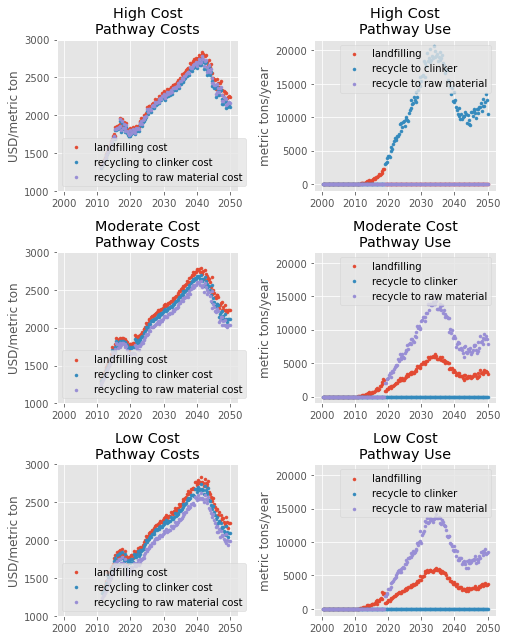

In [5]:
max_width_mm = 180.0
in_to_mm = 0.0393701

fig = plt.figure(figsize=(max_width_mm * in_to_mm, 9))

baupath = fig.add_subplot(3, 2, 2)
mcpath = fig.add_subplot(3, 2, 4, sharex=baupath, sharey=baupath)
hcpath = fig.add_subplot(3, 2, 6, sharex=baupath, sharey=baupath)

baucost = fig.add_subplot(3, 2, 1, sharex=baupath)
mccost = fig.add_subplot(3, 2, 3, sharex=baupath, sharey=baucost)
hccost = fig.add_subplot(3, 2, 5, sharex=baupath, sharey = baucost)

## Cost Histories ##

for i in bau_cost_dat['pathway'].unique():
    baucost.scatter(bau_cost_dat.loc[(bau_cost_dat['pathway']==i) &
                                    (bau_cost_dat['coarse grinding location']==coarse_loc) &
                                    (bau_cost_dat['distance to recycling facility']==rec_dist) &
                                    (bau_cost_dat['distance to cement plant']==cem_dist)]['year'],
                    bau_cost_dat.loc[(bau_cost_dat['pathway']==i) &
                                    (bau_cost_dat['coarse grinding location']==coarse_loc) &
                                    (bau_cost_dat['distance to recycling facility']==rec_dist) &
                                    (bau_cost_dat['distance to cement plant']==cem_dist)]['cost'],
                    s=9, label=i)

for k in mc_cost_dat['pathway'].unique():
    mccost.scatter(mc_cost_dat.loc[(mc_cost_dat['pathway']==k) &
                                  (mc_cost_dat['coarse grinding location']==coarse_loc) &
                                  (mc_cost_dat['distance to recycling facility']==rec_dist) &
                                  (mc_cost_dat['distance to cement plant']==cem_dist)]['year'],
                  mc_cost_dat.loc[(mc_cost_dat['pathway']==k) &
                                  (mc_cost_dat['coarse grinding location']==coarse_loc) &
                                  (mc_cost_dat['distance to recycling facility']==rec_dist) &
                                  (mc_cost_dat['distance to cement plant']==cem_dist)]['cost'],
                  s=9, label=k)

for j in hc_cost_dat['pathway'].unique():
    hccost.scatter(hc_cost_dat.loc[(hc_cost_dat['pathway']==j) &
                                  (hc_cost_dat['coarse grinding location']==coarse_loc) &
                                  (hc_cost_dat['distance to recycling facility']==rec_dist) &
                                  (hc_cost_dat['distance to cement plant']==cem_dist)]['year'],
                   hc_cost_dat.loc[(hc_cost_dat['pathway']==j) &
                                  (hc_cost_dat['coarse grinding location']==coarse_loc) &
                                  (hc_cost_dat['distance to recycling facility']==rec_dist) &
                                  (hc_cost_dat['distance to cement plant']==cem_dist)]['cost'],
                   s=9, label=j)

for i in bau_use_dat['process'].unique():
    baupath.scatter(bau_use_dat.loc[(bau_use_dat['process']==i) &
                                   (bau_use_dat['coarse grinding location']==coarse_loc) &
                                   (bau_use_dat['distance to recycling facility']==rec_dist) &
                                   (bau_use_dat['distance to cement plant']==cem_dist)]['year'], 
                    bau_use_dat.loc[(bau_use_dat['process']==i) &
                                   (bau_use_dat['coarse grinding location']==coarse_loc) &
                                   (bau_use_dat['distance to recycling facility']==rec_dist) &
                                   (bau_use_dat['distance to cement plant']==cem_dist)]['mass'],
                    s=9, label=i)

for k in mc_use_dat['process'].unique():
    mcpath.scatter(mc_use_dat.loc[(mc_use_dat['process']==k) &
                                  (mc_use_dat['coarse grinding location']==coarse_loc) &
                                  (mc_use_dat['distance to recycling facility']==rec_dist) &
                                  (mc_use_dat['distance to cement plant']==cem_dist)]['year'], 
                  mc_use_dat.loc[(mc_use_dat['process']==k) &
                                  (mc_use_dat['coarse grinding location']==coarse_loc) &
                                  (mc_use_dat['distance to recycling facility']==rec_dist) &
                                  (mc_use_dat['distance to cement plant']==cem_dist)]['mass'],
                  s=9, label=k)

for j in hc_use_dat['process'].unique():
    hcpath.scatter(hc_use_dat.loc[(hc_use_dat['process']==j) &
                                 (hc_use_dat['coarse grinding location']==coarse_loc) &
                                 (hc_use_dat['distance to recycling facility']==rec_dist) &
                                 (hc_use_dat['distance to cement plant']==cem_dist)]['year'],
                   hc_use_dat.loc[(hc_use_dat['process']==j) &
                                 (hc_use_dat['coarse grinding location']==coarse_loc) &
                                 (hc_use_dat['distance to recycling facility']==rec_dist) &
                                 (hc_use_dat['distance to cement plant']==cem_dist)]['mass'],
                   s=9, label=j)

    
baucost.legend()
mccost.legend()
hccost.legend()
baupath.legend()
mcpath.legend()
hcpath.legend()

baucost.set_ylabel("USD/metric ton")
mccost.set_ylabel('USD/metric ton')
hccost.set_ylabel("USD/metric ton")

baucost.set_ylim([1000, 3000])

baucost.set_title("High Cost\nPathway Costs")
mccost.set_title("Moderate Cost\nPathway Costs")
hccost.set_title("Low Cost\nPathway Costs")

baupath.set_ylabel('metric tons/year')
mcpath.set_ylabel("metric tons/year")
hcpath.set_ylabel('metric tons/year')

baupath.set_title('High Cost\nPathway Use')
mcpath.set_title("Moderate Cost\nPathway Use")
hcpath.set_title('Low Cost\nPathway Use')

plt.tight_layout()

In [6]:
fig.savefig('pathwaycostuse-summary.tiff', dpi=300)

### Cumulative GWP
Results are shown for the same three scenarios as in the pathway cost and use summary plot above.

Calculate cumulative GWP, by stage, without normalizing. 

In [8]:
gwp_subset = gwp.loc[(gwp['coarse grinding location']==coarse_loc) &
                    (gwp['distance to recycling facility']==rec_dist) &
                    (gwp['distance to cement plant']==cem_dist)]

# expand the df to include data (zeros used to fill for missing data) for all years
x_axis = np.arange(2000, 2051, step=1)

gwp_idx = pd.MultiIndex.from_product([x_axis, gwp_subset.stage.unique(),
                                      gwp_subset.material.unique(), gwp_subset.scenario.unique(),
                                      gwp_subset['coarse grinding location'].unique(),
                                      gwp_subset['distance to recycling facility'].unique(),
                                      gwp_subset['distance to cement plant'].unique()])

gwp_subset_idx = gwp_subset.set_index(['year', 'stage', 'material', 'scenario',
                                      'coarse grinding location',
                                      'distance to recycling facility',
                                      'distance to cement plant']).reindex(gwp_idx).fillna(0).reset_index()
gwp_subset_idx.rename(columns={'level_0':'year',
                              'level_1':'stage',
                              'level_2':'material',
                              'level_3':'scenario',
                              'level_4':'coarse grinding location',
                              'level_5':'distance to recycling facility',
                              'level_6':'distance to cement plant'}, inplace=True)

# sum emissions across material types and get the cumulative sum by year
gwp_cm = gwp_subset_idx.groupby(['year','stage', 'scenario', 'coarse grinding location',
                                 'distance to recycling facility',
                                 'distance to cement plant']).sum().groupby(['stage','scenario',
                                                                             'distance to recycling facility',
                                                                             'distance to cement plant']).cumsum().reset_index()

Get numbers for calculating percent change in GWP.

In [9]:
gwp_cm.loc[(gwp_cm.year==2050) & (gwp_cm.scenario=='hc')]

,year,stage,scenario,coarse grinding location,distance to recycling facility,distance to cement plant,gwp
751,2050,landfilling,hc,onsite,51,204,6.060694e+03
754,2050,manufacturing,hc,onsite,51,204,6.779645e+07
757,2050,recycle to clinker,hc,onsite,51,204,0.000000e+00
760,2050,recycle to raw material,hc,onsite,51,204,3.293099e+05
763,2050,transportation,hc,onsite,51,204,1.316183e+06


In [10]:
gwp_cm.loc[(gwp_cm.year==2050) & (gwp_cm.scenario=='mc')]

,year,stage,scenario,coarse grinding location,distance to recycling facility,distance to cement plant,gwp
752,2050,landfilling,mc,onsite,51,204,6.076497e+03
755,2050,manufacturing,mc,onsite,51,204,6.779645e+07
758,2050,recycle to clinker,mc,onsite,51,204,0.000000e+00
761,2050,recycle to raw material,mc,onsite,51,204,3.304385e+05
764,2050,transportation,mc,onsite,51,204,1.320212e+06


In [11]:
gwp_cm.loc[(gwp_cm.year==2050) & (gwp_cm.scenario=='bau')]

,year,stage,scenario,coarse grinding location,distance to recycling facility,distance to cement plant,gwp
750,2050,landfilling,bau,onsite,51,204,4.139909e+02
753,2050,manufacturing,bau,onsite,51,204,6.773853e+07
756,2050,recycle to clinker,bau,onsite,51,204,2.356942e+05
759,2050,recycle to raw material,bau,onsite,51,204,0.000000e+00
762,2050,transportation,bau,onsite,51,204,5.138923e+06


Plot cumulative GWP as a stacked bar chart, INCLUDING MANUFACTURING.

<ipython-input-12-83f42f96abce>:60: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  fig.legend([bauimp, mcimp, hcimp],


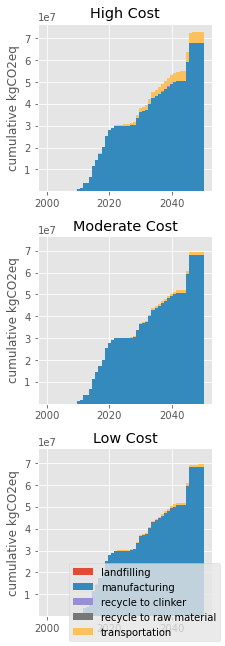

In [12]:
gwp_cm_bau = gwp_cm.loc[(gwp_cm['scenario']=='bau')]
gwp_cm_mc = gwp_cm.loc[(gwp_cm['scenario']=='mc')]
gwp_cm_hc = gwp_cm.loc[(gwp_cm['scenario']=='hc')]

width_mm = 80.0
in_to_mm = 0.0393701

fig = plt.figure(figsize=(width_mm * in_to_mm, 9))

bauimp = fig.add_subplot(3, 1, 1)
mcimp = fig.add_subplot(3, 1, 2, sharex=bauimp, sharey=bauimp)
hcimp = fig.add_subplot(3, 1, 3, sharex=bauimp, sharey=bauimp)

impbar_width=1

## Create BAU Plot ##
for j in gwp_cm_bau.stage.unique():
    bar_heights = gwp_cm_bau.loc[(gwp_cm_bau['stage']==j), 'gwp'].values
    
    # if no stages have been plotted yet,
    if j == gwp_cm_bau.stage.unique()[0]:
        bauimp.bar(x_axis, bar_heights, label=j,width=impbar_width)
        bar_bottom = bar_heights

    else:
        bauimp.bar(x_axis, bar_heights, bottom=bar_bottom, label=j,width=impbar_width)
        bar_bottom = np.add(bar_bottom, bar_heights)
        
        
## Create MC Plot ##
for j in gwp_cm_mc.stage.unique():
    bar_heights = gwp_cm_mc.loc[(gwp_cm_mc['stage']==j), 'gwp'].values
    
    # if no stages have been plotted yet,
    if j == gwp_cm_mc.stage.unique()[0]:
        mcimp.bar(x_axis, bar_heights, label=j,width=impbar_width)
        bar_bottom = bar_heights

    else:
        mcimp.bar(x_axis, bar_heights, bottom=bar_bottom, label=j,width=impbar_width)
        bar_bottom = np.add(bar_bottom, bar_heights)

## Create HC Plot ##
for j in gwp_cm_hc.stage.unique():
    bar_heights = gwp_cm_hc.loc[(gwp_cm_hc['stage']==j), 'gwp'].values
    
    # if no stages have been plotted yet,
    if j == gwp_cm_hc.stage.unique()[0]:
        hcimp.bar(x_axis, bar_heights, label=j,width=impbar_width)
        bar_bottom = bar_heights

    else:
        hcimp.bar(x_axis, bar_heights, bottom=bar_bottom, label=j,width=impbar_width)
        bar_bottom = np.add(bar_bottom, bar_heights)

        
labels = ['landfilling', 'manufacturing', 'recycle to clinker',
         'recycle to raw material', 'transportation']

fig.legend([bauimp, mcimp, hcimp],
          labels=labels,
          loc='lower right')

#plt.subplots_adjust(top=0.6)


#bauimp.set_xlim([2010,2050])

bauimp.set_ylabel('cumulative kgCO2eq')
mcimp.set_ylabel('cumulative kgCO2eq')
hcimp.set_ylabel('cumulative kgCO2eq')

bauimp.set_title('High Cost')
mcimp.set_title("Moderate Cost")
hcimp.set_title('Low Cost')

plt.tight_layout()

In [13]:
fig.savefig('impacts-cumulative-withmanuf.tiff', dpi=300)

Plot cumulative GWP as a stacked bar chart, WITHOUT MANUFACTURING.

<ipython-input-14-601f1ec75f61>:60: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  fig.legend([bauimp, mcimp, hcimp],


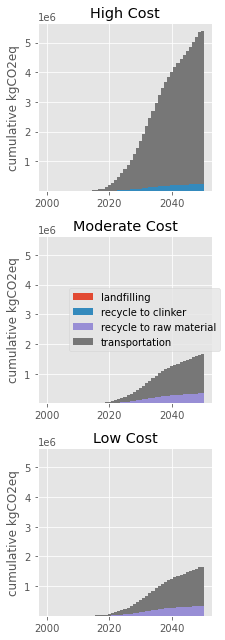

In [14]:
gwp_cm_bau = gwp_cm.loc[(gwp_cm['scenario']=='bau') & (gwp_cm['stage']!='manufacturing')]
gwp_cm_mc = gwp_cm.loc[(gwp_cm['scenario']=='mc') & (gwp_cm['stage']!='manufacturing')]
gwp_cm_hc = gwp_cm.loc[(gwp_cm['scenario']=='hc') & (gwp_cm['stage']!='manufacturing')]

width_mm = 80.0
in_to_mm = 0.0393701

fig = plt.figure(figsize=(width_mm * in_to_mm, 9))

bauimp = fig.add_subplot(3, 1, 1)
mcimp = fig.add_subplot(3, 1, 2, sharex=bauimp, sharey=bauimp)
hcimp = fig.add_subplot(3, 1, 3, sharex=bauimp, sharey=bauimp)

impbar_width=1

## Create BAU Plot ##
for j in gwp_cm_bau.stage.unique():
    bar_heights = gwp_cm_bau.loc[(gwp_cm_bau['stage']==j), 'gwp'].values
    
    # if no stages have been plotted yet,
    if j == gwp_cm_bau.stage.unique()[0]:
        bauimp.bar(x_axis, bar_heights, label=j,width=impbar_width)
        bar_bottom = bar_heights

    else:
        bauimp.bar(x_axis, bar_heights, bottom=bar_bottom, label=j,width=impbar_width)
        bar_bottom = np.add(bar_bottom, bar_heights)
        
        
## Create MC Plot ##
for j in gwp_cm_mc.stage.unique():
    bar_heights = gwp_cm_mc.loc[(gwp_cm_mc['stage']==j), 'gwp'].values
    
    # if no stages have been plotted yet,
    if j == gwp_cm_mc.stage.unique()[0]:
        mcimp.bar(x_axis, bar_heights, label=j,width=impbar_width)
        bar_bottom = bar_heights

    else:
        mcimp.bar(x_axis, bar_heights, bottom=bar_bottom, label=j,width=impbar_width)
        bar_bottom = np.add(bar_bottom, bar_heights)

## Create HC Plot ##
for j in gwp_cm_hc.stage.unique():
    bar_heights = gwp_cm_hc.loc[(gwp_cm_hc['stage']==j), 'gwp'].values
    
    # if no stages have been plotted yet,
    if j == gwp_cm_hc.stage.unique()[0]:
        hcimp.bar(x_axis, bar_heights, label=j,width=impbar_width)
        bar_bottom = bar_heights

    else:
        hcimp.bar(x_axis, bar_heights, bottom=bar_bottom, label=j,width=impbar_width)
        bar_bottom = np.add(bar_bottom, bar_heights)

        
labels = ['landfilling', 'recycle to clinker',
         'recycle to raw material', 'transportation']

fig.legend([bauimp, mcimp, hcimp],
          labels=labels,
          loc='center right')


#bauimp.set_xlim([2010,2050])

bauimp.set_ylabel('cumulative kgCO2eq')
mcimp.set_ylabel('cumulative kgCO2eq')
hcimp.set_ylabel('cumulative kgCO2eq')

bauimp.set_title('High Cost')
mcimp.set_title("Moderate Cost")
hcimp.set_title('Low Cost')

plt.tight_layout()


In [55]:
fig.savefig('impacts-cumulative-nomanuf.png', dpi=300)

In [56]:
gwp_cm.loc[(gwp_cm.year==2050) & (gwp_cm.scenario=='hc')]

,year,stage,scenario,coarse grinding location,distance to recycling facility,distance to cement plant,gwp
751,2050,landfilling,hc,onsite,51,204,6.060694e+03
754,2050,manufacturing,hc,onsite,51,204,6.779645e+07
757,2050,recycle to clinker,hc,onsite,51,204,0.000000e+00
760,2050,recycle to raw material,hc,onsite,51,204,3.293099e+05
763,2050,transportation,hc,onsite,51,204,1.316183e+06


### Normalized GWP per timestep

Normalize non-manufacturing GWP per timestep and stage (sum over materials) by the mass of blades reaching EOL each timestep. The blade mass is in the inventory dataframe.

In [57]:
# Only looking at EOL process GWP by timestep
gwp_timestep = gwp_subset_idx.loc[(gwp_subset_idx['stage']!='manufacturing') &
                                 (gwp_subset_idx['material']=='glass fiber reinforced polymer')]

blades_eol_timestep = inv.loc[(inv.material=='glass fiber reinforced polymer') &
                              (inv.process!='manufacturing') &
                             (inv['coarse grinding location']==coarse_loc) &
                             (inv['distance to recycling facility']==rec_dist) &
                             (inv['distance to cement plant']==cem_dist)]
blades_eol_timestep.rename(columns={'process': 'stage'})
blades_eol_timestep['year'] = blades_eol_timestep['year'].astype(int)

# sum up blades across EOL processes
blades_eol_total_timestep = blades_eol_timestep.groupby(['year', 'scenario', 'coarse grinding location',
                                                         'distance to recycling facility',
                                                         'distance to cement plant'], as_index=False).sum()
blades_eol_total_timestep.drop(columns='cumul_mass', inplace=True)
blades_eol_total_timestep.rename(columns={'mass': 'eol blade mass'}, inplace=True)

gwp_normalize = gwp_timestep.merge(blades_eol_total_timestep, how='outer',
                                  on=['year', 'scenario', 'coarse grinding location',
                                                         'distance to recycling facility',
                                                         'distance to cement plant'])
gwp_normalize['gwp normalized'] = gwp_normalize['gwp'] / gwp_normalize['eol blade mass']
gwp_normalize['gwp normalized'] = gwp_normalize['gwp normalized'].fillna(0)

<ipython-input-57-81bde2415750>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  blades_eol_timestep['year'] = blades_eol_timestep['year'].astype(int)


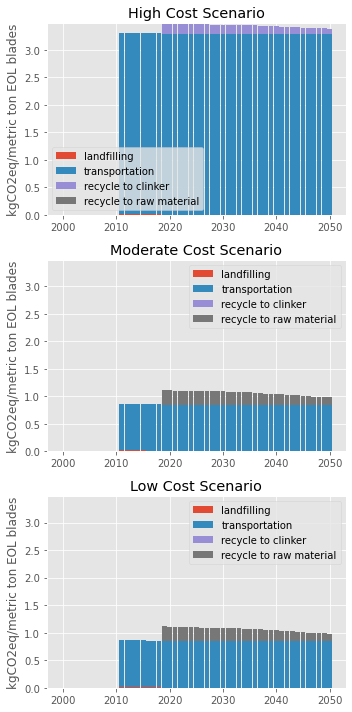

In [58]:
gwp_nr_bau = gwp_normalize.loc[gwp_normalize['scenario']=='bau']
gwp_nr_mc = gwp_normalize.loc[gwp_normalize['scenario']=='mc']
gwp_nr_hc = gwp_normalize.loc[gwp_normalize['scenario']=='hc']

fig = plt.figure(figsize=(5, 10))

baunrimp = fig.add_subplot(3, 1, 1)
mcnrimp = fig.add_subplot(3, 1, 2, sharex=baunrimp, sharey=baunrimp)
hcnrimp = fig.add_subplot(3, 1, 3, sharex=baunrimp, sharey=baunrimp)

impbar_width=0.9

## Create BAU Plot ##
for j in gwp_nr_bau.stage.unique():
    bar_heights = gwp_nr_bau.loc[(gwp_nr_bau['stage']==j), 'gwp normalized'].values
    
    # if no stages have been plotted yet,
    if j == gwp_nr_bau.stage.unique()[0]:
        baunrimp.bar(x_axis, bar_heights, label=j, width=impbar_width)
        bar_bottom = bar_heights

    else:
        baunrimp.bar(x_axis, bar_heights, bottom=bar_bottom, label=j,width=impbar_width)
        bar_bottom = np.add(bar_bottom, bar_heights)

## Create MC Plot ##
for j in gwp_nr_mc.stage.unique():
    bar_heights = gwp_nr_mc.loc[(gwp_nr_mc['stage']==j), 'gwp normalized'].values
    
    # if no stages have been plotted yet,
    if j == gwp_nr_mc.stage.unique()[0]:
        mcnrimp.bar(x_axis, bar_heights, label=j, width=impbar_width)
        bar_bottom = bar_heights

    else:
        mcnrimp.bar(x_axis, bar_heights, bottom=bar_bottom, label=j,width=impbar_width)
        bar_bottom = np.add(bar_bottom, bar_heights)
        

## Create HC Plot ##
for j in gwp_nr_hc.stage.unique():
    bar_heights = gwp_nr_hc.loc[(gwp_nr_hc['stage']==j), 'gwp normalized'].values
    
    # if no stages have been plotted yet,
    if j == gwp_nr_hc.stage.unique()[0]:
        hcnrimp.bar(x_axis, bar_heights, label=j, width=impbar_width)
        bar_bottom = bar_heights

    else:
        hcnrimp.bar(x_axis, bar_heights, bottom=bar_bottom, label=j,width=impbar_width)
        bar_bottom = np.add(bar_bottom, bar_heights)

baunrimp.legend()
mcnrimp.legend()
hcnrimp.legend()

#baunrimp.set_ylim([0, 4.0])

baunrimp.set_ylabel('kgCO2eq/metric ton EOL blades')
mcnrimp.set_ylabel('kgCO2eq/metric ton EOL blades')
hcnrimp.set_ylabel('kgCO2eq/metric ton EOL blades')

baunrimp.set_title('High Cost Scenario')
mcnrimp.set_title("Moderate Cost Scenario")
hcnrimp.set_title('Low Cost Scenario')

plt.tight_layout()

In [15]:
fig.savefig('impacts-normalized-nomanuf.png')

<ipython-input-59-32c02d0f10ca>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  blades_eol_timestep['year'] = blades_eol_timestep['year'].astype(int)
C:\Users\rhanes\AppData\Local\Continuum\anaconda3\envs\celavi\lib\site-packages\matplotlib\transforms.py:1978: RuntimeWarning: invalid value encountered in double_scalars
  self._mtx[1, 2] += ty
C:\Users\rhanes\AppData\Local\Continuum\anaconda3\envs\celavi\lib\site-packages\matplotlib\transforms.py:379: RuntimeWarning: invalid value encountered in double_scalars
  return (x0, y0, x1 - x0, y1 - y0)


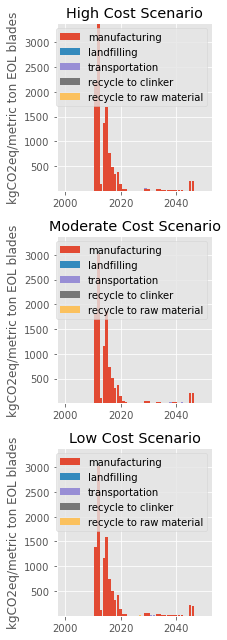

In [59]:
# Now looking at EOL *and* manufacturing processes by timestep
gwp_timestep = gwp_subset_idx.loc[(gwp_subset_idx['material']=='glass fiber reinforced polymer')]

blades_eol_timestep = inv.loc[(inv.material=='glass fiber reinforced polymer') &
                              (inv.process!='manufacturing')]
blades_eol_timestep.rename(columns={'process': 'stage'})
blades_eol_timestep['year'] = blades_eol_timestep['year'].astype(int)

# sum up blades across EOL processes
blades_eol_total_timestep = blades_eol_timestep.groupby(['year', 'scenario', 'material', 'coarse grinding location',
                                                         'distance to recycling facility',
                                                         'distance to cement plant'], as_index=False).sum()
blades_eol_total_timestep.drop(columns='cumul_mass', inplace=True)

blades_eol_total_timestep.rename(columns={'mass': 'eol blade mass'}, inplace=True)

gwp_normalize = gwp_timestep.merge(blades_eol_total_timestep, how='left',
                                  on=['year', 'scenario', 'material', 'coarse grinding location',
                                                         'distance to recycling facility',
                                                         'distance to cement plant'])
gwp_normalize['gwp normalized'] = gwp_normalize['gwp'] / gwp_normalize['eol blade mass']

gwp_normalize['gwp normalized'] = gwp_normalize['gwp normalized'].fillna(0)

gwp_nr_bau = gwp_normalize.loc[gwp_normalize['scenario']=='bau']
gwp_nr_mc = gwp_normalize.loc[gwp_normalize['scenario']=='mc']
gwp_nr_hc = gwp_normalize.loc[gwp_normalize['scenario']=='hc']

width_mm = 80.0
in_to_mm = 0.0393701

fig = plt.figure(figsize=(width_mm * in_to_mm, 9))

baunrimp = fig.add_subplot(3, 1, 1)
mcnrimp = fig.add_subplot(3, 1, 2, sharex=baunrimp, sharey=baunrimp)
hcnrimp = fig.add_subplot(3, 1, 3, sharex=baunrimp, sharey=baunrimp)

impbar_width=0.9

## Create BAU Plot ##
for j in gwp_nr_bau.stage.unique():
    bar_heights = gwp_nr_bau.loc[(gwp_nr_bau['stage']==j), 'gwp normalized'].values
    
    # if no stages have been plotted yet,
    if j == gwp_nr_bau.stage.unique()[0]:
        baunrimp.bar(x_axis, bar_heights, label=j, width=impbar_width)
        bar_bottom = bar_heights

    else:
        baunrimp.bar(x_axis, bar_heights, bottom=bar_bottom, label=j,width=impbar_width)
        bar_bottom = np.add(bar_bottom, bar_heights)

## Create MC Plot ##
for j in gwp_nr_mc.stage.unique():
    bar_heights = gwp_nr_mc.loc[(gwp_nr_mc['stage']==j), 'gwp normalized'].values
    
    # if no stages have been plotted yet,
    if j == gwp_nr_mc.stage.unique()[0]:
        mcnrimp.bar(x_axis, bar_heights, label=j, width=impbar_width)
        bar_bottom = bar_heights

    else:
        mcnrimp.bar(x_axis, bar_heights, bottom=bar_bottom, label=j,width=impbar_width)
        bar_bottom = np.add(bar_bottom, bar_heights)
        

## Create HC Plot ##
for j in gwp_nr_hc.stage.unique():
    bar_heights = gwp_nr_hc.loc[(gwp_nr_hc['stage']==j), 'gwp normalized'].values
    
    # if no stages have been plotted yet,
    if j == gwp_nr_hc.stage.unique()[0]:
        hcnrimp.bar(x_axis, bar_heights, label=j, width=impbar_width)
        bar_bottom = bar_heights

    else:
        hcnrimp.bar(x_axis, bar_heights, bottom=bar_bottom, label=j,width=impbar_width)
        bar_bottom = np.add(bar_bottom, bar_heights)

baunrimp.legend()
mcnrimp.legend()
hcnrimp.legend()

#baunrimp.set_ylim([0, 4.0])

baunrimp.set_ylabel('kgCO2eq/metric ton EOL blades')
mcnrimp.set_ylabel('kgCO2eq/metric ton EOL blades')
hcnrimp.set_ylabel('kgCO2eq/metric ton EOL blades')

baunrimp.set_title('High Cost Scenario')
mcnrimp.set_title("Moderate Cost Scenario")
hcnrimp.set_title('Low Cost Scenario')

plt.tight_layout()

In [424]:
fig.savefig('impacts-normalized-withmanuf.png', dpi=220)

### Graph of outflow circularity metric per timestep

In [15]:
blades_outflow = inv.loc[(inv.material=='glass fiber reinforced polymer') &
                        (inv.process!='manufacturing')]
blades_outflow.drop(columns=['material', 'cumul_mass'], inplace=True)

# add a column that's the total EOL blade mass in each timestep - as was done in the normalized GWP plot
blades_outflow_total = blades_outflow.groupby(['year', 'scenario', 'coarse grinding location',
                                               'distance to recycling facility',
                                               'distance to cement plant'], as_index=False).sum()
blades_outflow_total.rename(columns={'mass': 'total eol mass'}, inplace=True)

blades_outflow = blades_outflow.merge(blades_outflow_total, on=['year', 'scenario', 'coarse grinding location',
                                                                'distance to recycling facility',
                                                                'distance to cement plant'], how='outer')
blades_outflow_rec = blades_outflow.loc[(blades_outflow.process=='recycle to clinker') |
                                        (blades_outflow.process=='recycle to raw material')]
blades_outflow_rec['pct outflow circularity'] = 100.0 * blades_outflow_rec['mass'] / blades_outflow_rec['total eol mass']
blades_outflow_rec.drop(columns=['mass', 'total eol mass', 'process'], inplace=True)
blades_outflow = blades_outflow_rec.groupby(['year', 'scenario', 'coarse grinding location',
                                                                'distance to recycling facility',
                                                                'distance to cement plant']).max().fillna(0).reset_index()

outflow_bau = blades_outflow.loc[(blades_outflow.scenario=='bau') &
                                    (blades_outflow['coarse grinding location']==coarse_loc) &
                                    (blades_outflow['distance to recycling facility']==rec_dist) &
                                    (blades_outflow['distance to cement plant']==cem_dist)]
outflow_mc = blades_outflow.loc[(blades_outflow.scenario=='mc') &
                                    (blades_outflow['coarse grinding location']==coarse_loc) &
                                    (blades_outflow['distance to recycling facility']==rec_dist) &
                                    (blades_outflow['distance to cement plant']==cem_dist)]
outflow_hc = blades_outflow.loc[(blades_outflow.scenario=='hc') &
                                    (blades_outflow['coarse grinding location']==coarse_loc) &
                                    (blades_outflow['distance to recycling facility']==rec_dist) &
                                    (blades_outflow['distance to cement plant']==cem_dist)]

C:\Users\rhanes\AppData\Local\Continuum\anaconda3\envs\celavi\lib\site-packages\pandas\core\frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
<ipython-input-15-deb1ecc2c101>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  blades_outflow_rec['pct outflow circularity'] = 100.0 * blades_outflow_rec['mass'] / blades_outflow_rec['total eol mass']


### Graph of inflow circularity metric per timestep

In [16]:
# GFRP recycled to clinker can displace a maximum of 15.5% of 0.003645 metric tons sand per metric ton of concrete
# if recycle to clinker is active then the displacement will be 0.000564975 x concrete mass

inflow = inv.loc[((inv.process=='manufacturing') | (inv.process=='recycle to clinker')) &
                (inv['coarse grinding location']==coarse_loc) &
                (inv['distance to recycling facility']==rec_dist) &
                (inv['distance to cement plant']==cem_dist)]
inflow['year'] = inflow['year'].astype(int)

inflow_year = inflow.groupby(['year', 'material', 'process', 'scenario',
                             'coarse grinding location',
                             'distance to recycling facility',
                             'distance to cement plant']).sum().reset_index()
inflow_year['pct inflow circularity'] = 0.0

inflow_year.loc[(inflow_year.process=='recycle to clinker') &
                (inflow_year.mass>0), 'pct inflow circularity'] = 100 * 0.000564975

inflow_bau = inflow_year.loc[inflow_year.scenario=='bau']
inflow_mc = inflow_year.loc[inflow_year.scenario=='mc']
inflow_hc = inflow_year.loc[inflow_year.scenario=='hc']

<ipython-input-16-48ac36f90434>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  inflow['year'] = inflow['year'].astype(int)


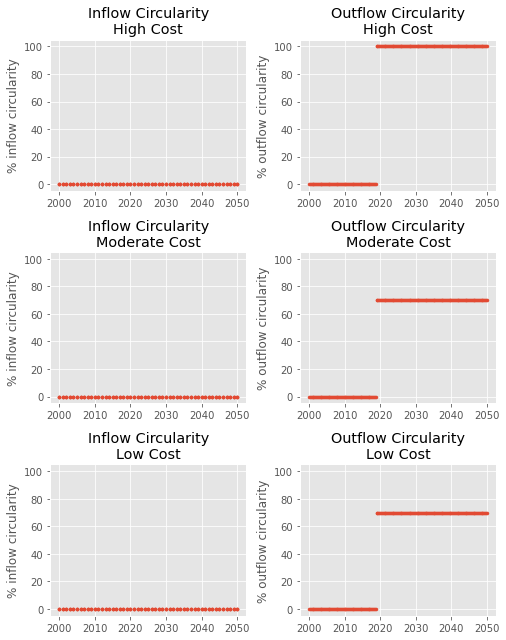

In [17]:
width_mm = 180.0
in_to_mm = 0.0393701

fig = plt.figure(figsize=(width_mm * in_to_mm, 9))
bauoutcirc = fig.add_subplot(3, 2, 2)
mcoutcirc = fig.add_subplot(3, 2, 4, sharex=bauoutcirc, sharey=bauoutcirc)
hcoutcirc = fig.add_subplot(3, 2, 6, sharex=bauoutcirc, sharey=bauoutcirc)

bauincirc = fig.add_subplot(3,2,1, sharex=bauoutcirc, sharey=bauoutcirc)
mcincirc = fig.add_subplot(3,2,3, sharex=bauoutcirc, sharey=bauoutcirc)
hcincirc = fig.add_subplot(3,2,5, sharex=bauoutcirc, sharey=bauoutcirc)


bauoutcirc.scatter(outflow_bau['year'], outflow_bau['pct outflow circularity'], s=9)

mcoutcirc.scatter(outflow_mc['year'], outflow_mc['pct outflow circularity'], s=9)

hcoutcirc.scatter(outflow_hc['year'], outflow_hc['pct outflow circularity'], s=9)

bauincirc.scatter(inflow_bau['year'], inflow_bau['pct inflow circularity'], s=9)

mcincirc.scatter(inflow_mc['year'], inflow_mc['pct inflow circularity'], s=9)

hcincirc.scatter(inflow_hc['year'], inflow_hc['pct inflow circularity'], s=9)

bauoutcirc.set_ylabel('% outflow circularity')
mcoutcirc.set_ylabel('% outflow circularity')
hcoutcirc.set_ylabel('% outflow circularity')

bauincirc.set_ylabel('% inflow circularity')
mcincirc.set_ylabel('% inflow circularity')
hcincirc.set_ylabel('% inflow circularity')

bauincirc.set_title('Inflow Circularity\nHigh Cost')
mcincirc.set_title('Inflow Circularity\nModerate Cost')
hcincirc.set_title('Inflow Circularity\nLow Cost')

bauoutcirc.set_title('Outflow Circularity\nHigh Cost')
mcoutcirc.set_title('Outflow Circularity\nModerate Cost')
hcoutcirc.set_title('Outflow Circularity\nLow Cost')

plt.tight_layout()

In [18]:
fig.savefig('circularity-time.tiff', dpi=300)

### Table of cumulative outflow circularity metrics

In [17]:
# pull out only 2050 values to calculate the cumulative circularity metrics
blades_eol = inv.loc[(inv.material=='glass fiber reinforced polymer') &
                    (inv.process!='manufacturing') &
                    (inv.year==2050)]

# calculate total cumulative EOL blade mass, across all EOL processes - group then sum
blades_eol_totals = blades_eol.groupby(['year', 'scenario', 'coarse grinding location',
                                        'distance to recycling facility',
                                        'distance to cement plant'], as_index=False).sum()

blades_eol_totals.rename(columns={'cumul_mass': 'total_cumul_mass'}, inplace=True)
blades_eol_totals.drop(columns='mass', inplace=True)

blades_eol = blades_eol.groupby(['year', 'process', 'scenario', 'coarse grinding location',
                                        'distance to recycling facility',
                                        'distance to cement plant'], as_index=False).sum()
blades_eol.drop(columns=['mass'], inplace=True)

blades_cumul_metrics = blades_eol_totals.merge(blades_eol, how='outer', 
                                              on=['year', 'scenario', 'coarse grinding location',
                                                  'distance to recycling facility',
                                                  'distance to cement plant'])

blades_cumul_metrics['pct circularity outflow'] = blades_cumul_metrics['cumul_mass'] / blades_cumul_metrics['total_cumul_mass']
outflow_cumul_metrics = blades_cumul_metrics.loc[blades_cumul_metrics['process']!='landfilling']

outflow_cumul_metrics

,year,scenario,coarse grinding location,distance to recycling facility,distance to cement plant,total_cumul_mass,process,cumul_mass,pct circularity outflow
1,2050.0,bau,facility,9.0,187.0,1566436.0,recycle to clinker,0.0,0.000000
2,2050.0,bau,facility,9.0,187.0,1566436.0,recycle to raw material,38.5,0.000025
4,2050.0,bau,facility,51.0,204.0,1567519.0,recycle to clinker,0.0,0.000000
5,2050.0,bau,facility,51.0,204.0,1567519.0,recycle to raw material,45.5,0.000029
7,2050.0,bau,facility,765.0,803.0,1560464.0,recycle to clinker,0.0,0.000000
8,2050.0,bau,facility,765.0,803.0,1560464.0,recycle to raw material,28.0,0.000018
10,2050.0,bau,onsite,9.0,187.0,1565178.0,recycle to clinker,1539622.0,0.983672
11,2050.0,bau,onsite,9.0,187.0,1565178.0,recycle to raw material,0.0,0.000000
13,2050.0,bau,onsite,51.0,204.0,1563967.0,recycle to clinker,1539555.0,0.984391
14,2050.0,bau,onsite,51.0,204.0,1563967.0,recycle to raw material,0.0,0.000000


### Table of percent inflow circularity

In [148]:
# pull out only 2050 values to calculate the cumulative circularity metrics
# need GFRP to clinker and all concrete + blade materials
inflow = inv.loc[((inv.process=='manufacturing') | 
                  (inv.process=='recycle to clinker')) &
                 (inv.year==2050)]

# GFRP recycled to clinker can displace a maximum of 15.5% of 0.003645 metric tons sand per metric ton of concrete
# = 0.000564975 x concrete mass

# doing the calculations manually since there are only three non-zero values
#bau-onsite-51.0-204.
circ = 0.000564975

## Supplementary Information Graphs

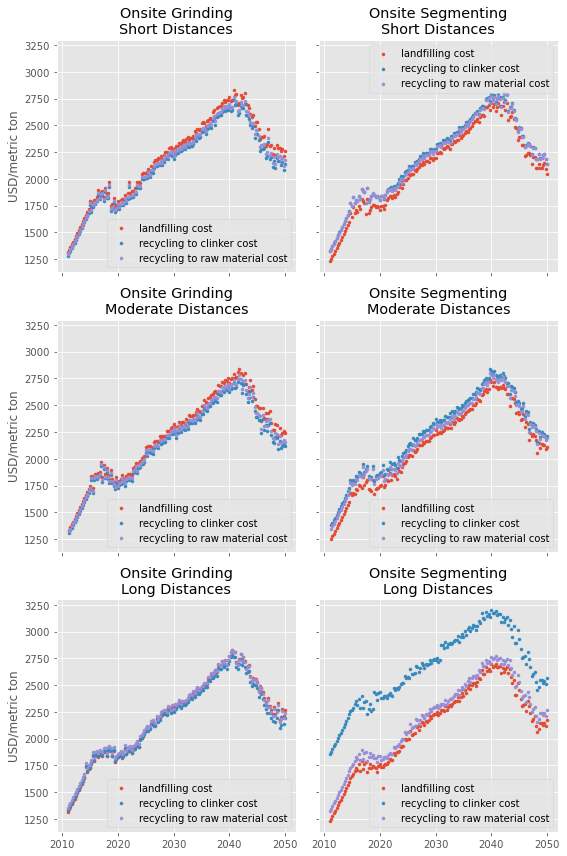

In [19]:
# costs by transpo distance and onsite/facility
# SCENARIO = Moderate Costs
# x = year
#y = pathway cost

fig, ((onslow, faclow),
      (onsmod, facmod),
      (onshigh, fachigh)) = plt.subplots(3, 2, sharex=True, sharey=True,
                                         figsize=(8, 12))


for j in bau_cost_dat['pathway'].unique():
    coarse_loc = 'onsite'
    rec_dist = 9.0
    cem_dist = 187.0
    
    onslow.scatter(bau_cost_dat.loc[(bau_cost_dat['pathway']==j) &
                                 (bau_cost_dat['coarse grinding location']==coarse_loc) &
                                 (bau_cost_dat['distance to recycling facility']==rec_dist) &
                                 (bau_cost_dat['distance to cement plant']==cem_dist)]['year'],
                   bau_cost_dat.loc[(bau_cost_dat['pathway']==j) &
                                 (bau_cost_dat['coarse grinding location']==coarse_loc) &
                                 (bau_cost_dat['distance to recycling facility']==rec_dist) &
                                 (bau_cost_dat['distance to cement plant']==cem_dist)]['cost'],
                   s=9, label=j)



for j in bau_cost_dat['pathway'].unique():
    coarse_loc = 'onsite'
    rec_dist = 51.0
    cem_dist = 204.0
    
    onsmod.scatter(bau_cost_dat.loc[(bau_cost_dat['pathway']==j) &
                                 (bau_cost_dat['coarse grinding location']==coarse_loc) &
                                 (bau_cost_dat['distance to recycling facility']==rec_dist) &
                                 (bau_cost_dat['distance to cement plant']==cem_dist)]['year'],
                   bau_cost_dat.loc[(bau_cost_dat['pathway']==j) &
                                 (bau_cost_dat['coarse grinding location']==coarse_loc) &
                                 (bau_cost_dat['distance to recycling facility']==rec_dist) &
                                 (bau_cost_dat['distance to cement plant']==cem_dist)]['cost'],
                   s=9, label=j)



for j in bau_cost_dat['pathway'].unique():
    coarse_loc = 'onsite'
    rec_dist = 765.0
    cem_dist = 803.0
    
    onshigh.scatter(bau_cost_dat.loc[(bau_cost_dat['pathway']==j) &
                                 (bau_cost_dat['coarse grinding location']==coarse_loc) &
                                 (bau_cost_dat['distance to recycling facility']==rec_dist) &
                                 (bau_cost_dat['distance to cement plant']==cem_dist)]['year'],
                   bau_cost_dat.loc[(bau_cost_dat['pathway']==j) &
                                 (bau_cost_dat['coarse grinding location']==coarse_loc) &
                                 (bau_cost_dat['distance to recycling facility']==rec_dist) &
                                 (bau_cost_dat['distance to cement plant']==cem_dist)]['cost'],
                   s=9, label=j)



for j in bau_cost_dat['pathway'].unique():
    coarse_loc = 'facility'
    rec_dist = 765.0
    cem_dist = 803.0
    
    fachigh.scatter(bau_cost_dat.loc[(bau_cost_dat['pathway']==j) &
                                 (bau_cost_dat['coarse grinding location']==coarse_loc) &
                                 (bau_cost_dat['distance to recycling facility']==rec_dist) &
                                 (bau_cost_dat['distance to cement plant']==cem_dist)]['year'],
                   bau_cost_dat.loc[(bau_cost_dat['pathway']==j) &
                                 (bau_cost_dat['coarse grinding location']==coarse_loc) &
                                 (bau_cost_dat['distance to recycling facility']==rec_dist) &
                                 (bau_cost_dat['distance to cement plant']==cem_dist)]['cost'],
                   s=9, label=j)



for j in bau_cost_dat['pathway'].unique():
    coarse_loc = 'facility'
    rec_dist = 51.0
    cem_dist = 204.0
    
    facmod.scatter(bau_cost_dat.loc[(bau_cost_dat['pathway']==j) &
                                 (bau_cost_dat['coarse grinding location']==coarse_loc) &
                                 (bau_cost_dat['distance to recycling facility']==rec_dist) &
                                 (bau_cost_dat['distance to cement plant']==cem_dist)]['year'],
                   bau_cost_dat.loc[(bau_cost_dat['pathway']==j) &
                                 (bau_cost_dat['coarse grinding location']==coarse_loc) &
                                 (bau_cost_dat['distance to recycling facility']==rec_dist) &
                                 (bau_cost_dat['distance to cement plant']==cem_dist)]['cost'],
                   s=9, label=j)

for j in bau_cost_dat['pathway'].unique():
    coarse_loc = 'facility'
    rec_dist = 9.0
    cem_dist = 187.0
    
    faclow.scatter(bau_cost_dat.loc[(bau_cost_dat['pathway']==j) &
                                 (bau_cost_dat['coarse grinding location']==coarse_loc) &
                                 (bau_cost_dat['distance to recycling facility']==rec_dist) &
                                 (bau_cost_dat['distance to cement plant']==cem_dist)]['year'],
                   bau_cost_dat.loc[(bau_cost_dat['pathway']==j) &
                                 (bau_cost_dat['coarse grinding location']==coarse_loc) &
                                 (bau_cost_dat['distance to recycling facility']==rec_dist) &
                                 (bau_cost_dat['distance to cement plant']==cem_dist)]['cost'],
                   s=9, label=j)

onslow.legend()
onslow.set_ylabel('USD/metric ton')
onslow.set_title('Onsite Grinding\nShort Distances')
onsmod.legend()
onsmod.set_ylabel('USD/metric ton')
onsmod.set_title('Onsite Grinding\nModerate Distances')
onshigh.legend()
onshigh.set_ylabel('USD/metric ton')
onshigh.set_title('Onsite Grinding\nLong Distances')
fachigh.legend()

fachigh.set_title('Onsite Segmenting\nLong Distances')
facmod.legend()

facmod.set_title('Onsite Segmenting\nModerate Distances')
faclow.legend()

faclow.set_title('Onsite Segmenting\nShort Distances')

plt.tight_layout()

In [20]:
fig.savefig('cost-sensitivity-summary.png', dpi=220)

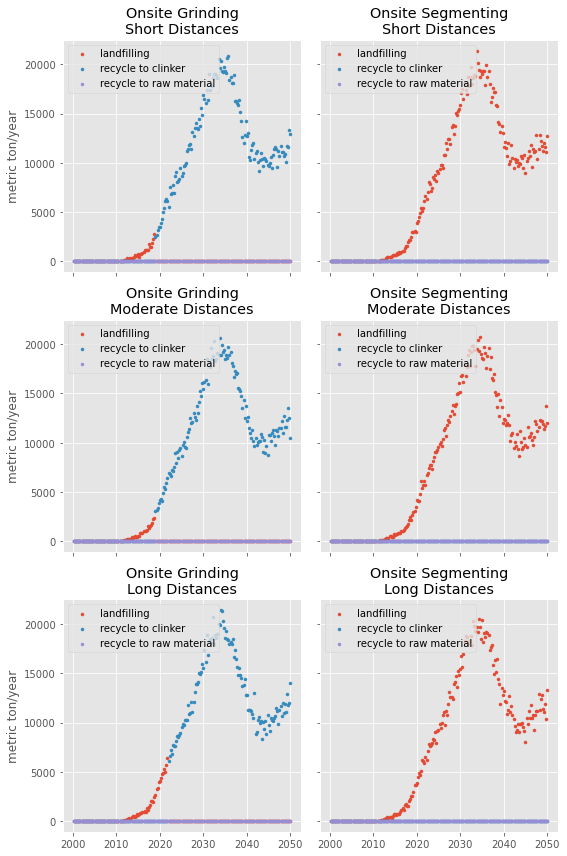

In [17]:
# use by transpo distance and onsite/facility
# SCENARIO = Moderate Costs
# x = year
#y = pathway cost

fig, ((onslow, faclow),
      (onsmod, facmod),
      (onshigh, fachigh)) = plt.subplots(3, 2, sharex=True, sharey=True,
                                         figsize=(8, 12))


for j in bau_use_dat['process'].unique():
    coarse_loc = 'onsite'
    rec_dist = 9.0
    cem_dist = 187.0
    
    onslow.scatter(bau_use_dat.loc[(bau_use_dat['process']==j) &
                                 (bau_use_dat['coarse grinding location']==coarse_loc) &
                                 (bau_use_dat['distance to recycling facility']==rec_dist) &
                                 (bau_use_dat['distance to cement plant']==cem_dist)]['year'],
                   bau_use_dat.loc[(bau_use_dat['process']==j) &
                                 (bau_use_dat['coarse grinding location']==coarse_loc) &
                                 (bau_use_dat['distance to recycling facility']==rec_dist) &
                                 (bau_use_dat['distance to cement plant']==cem_dist)]['mass'],
                   s=9, label=j)

onslow.legend()
onslow.set_ylabel('metric ton/year')
onslow.set_title('Onsite Grinding\nShort Distances')

for j in bau_use_dat['process'].unique():
    coarse_loc = 'onsite'
    rec_dist = 51.0
    cem_dist = 204.0
    
    onsmod.scatter(bau_use_dat.loc[(bau_use_dat['process']==j) &
                                 (bau_use_dat['coarse grinding location']==coarse_loc) &
                                 (bau_use_dat['distance to recycling facility']==rec_dist) &
                                 (bau_use_dat['distance to cement plant']==cem_dist)]['year'],
                   bau_use_dat.loc[(bau_use_dat['process']==j) &
                                 (bau_use_dat['coarse grinding location']==coarse_loc) &
                                 (bau_use_dat['distance to recycling facility']==rec_dist) &
                                 (bau_use_dat['distance to cement plant']==cem_dist)]['mass'],
                   s=9, label=j)

onsmod.legend()
onsmod.set_ylabel('metric ton/year')
onsmod.set_title('Onsite Grinding\nModerate Distances')

for j in bau_use_dat['process'].unique():
    coarse_loc = 'onsite'
    rec_dist = 765.0
    cem_dist = 803.0
    
    onshigh.scatter(bau_use_dat.loc[(bau_use_dat['process']==j) &
                                 (bau_use_dat['coarse grinding location']==coarse_loc) &
                                 (bau_use_dat['distance to recycling facility']==rec_dist) &
                                 (bau_use_dat['distance to cement plant']==cem_dist)]['year'],
                   bau_use_dat.loc[(bau_use_dat['process']==j) &
                                 (bau_use_dat['coarse grinding location']==coarse_loc) &
                                 (bau_use_dat['distance to recycling facility']==rec_dist) &
                                 (bau_use_dat['distance to cement plant']==cem_dist)]['mass'],
                   s=9, label=j)

onshigh.legend()
onshigh.set_ylabel('metric ton/year')
onshigh.set_title('Onsite Grinding\nLong Distances')

for j in bau_use_dat['process'].unique():
    coarse_loc = 'facility'
    rec_dist = 765.0
    cem_dist = 803.0
    
    fachigh.scatter(bau_use_dat.loc[(bau_use_dat['process']==j) &
                                 (bau_use_dat['coarse grinding location']==coarse_loc) &
                                 (bau_use_dat['distance to recycling facility']==rec_dist) &
                                 (bau_use_dat['distance to cement plant']==cem_dist)]['year'],
                   bau_use_dat.loc[(bau_use_dat['process']==j) &
                                 (bau_use_dat['coarse grinding location']==coarse_loc) &
                                 (bau_use_dat['distance to recycling facility']==rec_dist) &
                                 (bau_use_dat['distance to cement plant']==cem_dist)]['mass'],
                   s=9, label=j)

fachigh.legend()
#fachigh.set_ylabel('USD/metric ton')
fachigh.set_title('Onsite Segmenting\nLong Distances')

for j in bau_use_dat['process'].unique():
    coarse_loc = 'facility'
    rec_dist = 51.0
    cem_dist = 204.0
    
    facmod.scatter(bau_use_dat.loc[(bau_use_dat['process']==j) &
                                 (bau_use_dat['coarse grinding location']==coarse_loc) &
                                 (bau_use_dat['distance to recycling facility']==rec_dist) &
                                 (bau_use_dat['distance to cement plant']==cem_dist)]['year'],
                   bau_use_dat.loc[(bau_use_dat['process']==j) &
                                 (bau_use_dat['coarse grinding location']==coarse_loc) &
                                 (bau_use_dat['distance to recycling facility']==rec_dist) &
                                 (bau_use_dat['distance to cement plant']==cem_dist)]['mass'],
                   s=9, label=j)

facmod.legend()
#facmod.set_ylabel('metric tons/year')
facmod.set_title('Onsite Segmenting\nModerate Distances')

for j in bau_use_dat['process'].unique():
    coarse_loc = 'facility'
    rec_dist = 9.0
    cem_dist = 187.0
    
    faclow.scatter(bau_use_dat.loc[(bau_use_dat['process']==j) &
                                 (bau_use_dat['coarse grinding location']==coarse_loc) &
                                 (bau_use_dat['distance to recycling facility']==rec_dist) &
                                 (bau_use_dat['distance to cement plant']==cem_dist)]['year'],
                   bau_use_dat.loc[(bau_use_dat['process']==j) &
                                 (bau_use_dat['coarse grinding location']==coarse_loc) &
                                 (bau_use_dat['distance to recycling facility']==rec_dist) &
                                 (bau_use_dat['distance to cement plant']==cem_dist)]['mass'],
                   s=9, label=j)

faclow.legend()
#faclow.set_ylabel('USD/metric ton')
faclow.set_title('Onsite Segmenting\nShort Distances')

#fig.suptitle('Cost Sensitivity to Distance\nand Size Reduction Option',fontsize=16)

plt.tight_layout()

In [18]:
fig.savefig('use-sensitivity-summary.png', dpi=220)